<a href="https://colab.research.google.com/github/dhamashresth/IamShrest.github.io/blob/main/Secure_Vector_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Fraud.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
83556,False,False,False,False,False,False,False,False,False,False,False
83557,False,False,False,False,False,False,False,False,False,False,False
83558,False,False,False,False,False,False,False,False,False,False,False
83559,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data_ob = data.select_dtypes(object)

In [9]:
data_ob.columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
for col in data_ob:
    data_ob[col] = le.fit_transform(data_ob[col])

In [12]:
data_num = data.select_dtypes(["int64"])
data_float = data.select_dtypes(["float64"])

In [13]:
data_float.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [14]:
data_new = pd.concat([data_num, data_ob, data_float], axis = 1)
data_new.head()

,step,type,nameOrig,nameDest,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9871,27341,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,3,28654,28452,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,4,13026,8056,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,1,76619,7157,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,3,45087,14353,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [15]:
x = data_new.drop(["isFraud"], axis = 1)
y = data_new["isFraud"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [19]:
from sklearn.linear_model import LogisticRegression
xtrain, ytrain = shuffle(xtrain, ytrain, random_state=42)

# Drop rows with NaN values from xtrain and ytrain
nan_rows = xtrain.isnull().any(axis=1)
xtrain = xtrain[~nan_rows]
ytrain = ytrain[~nan_rows]

lr = LogisticRegression()
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score
ypred = lr.predict(xtest)
accuracy = accuracy_score(ytest, ypred)

In [21]:
accuracy_perfect = (accuracy)*100

<Axes: >

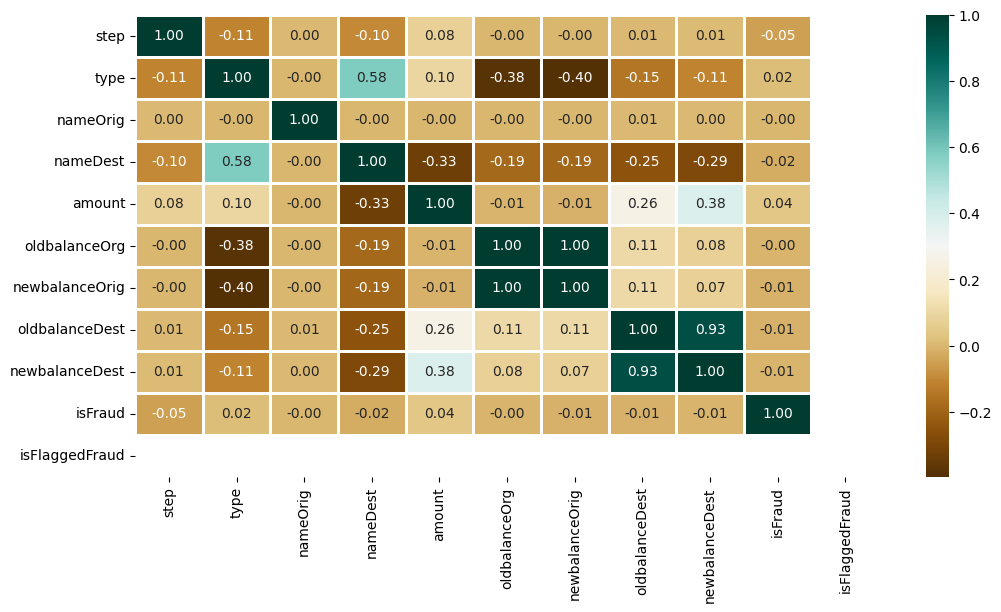

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_new.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<Figure size 1500x600 with 0 Axes>

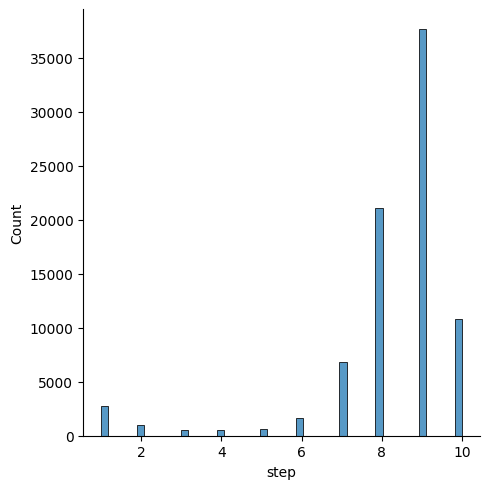

In [23]:
plt.figure(figsize=(15, 6))
sns.displot(data_new['step'], bins=50)

<Axes: xlabel='type', ylabel='amount'>

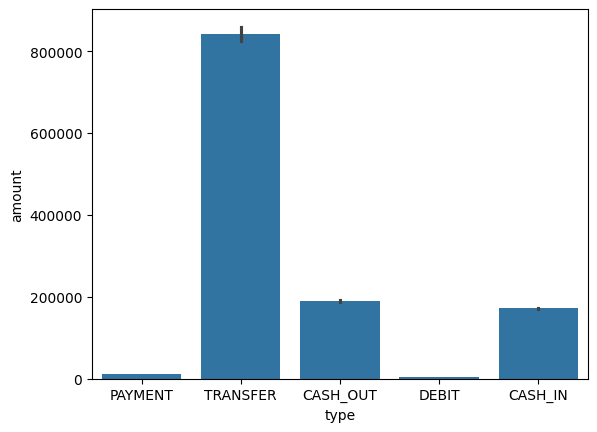

In [24]:
sns.barplot(x='type', y='amount', data=data)

In [25]:
print(f"Accuracy of the model : {accuracy_perfect}%")

Accuracy of the model : 99.84841836531174%
